In [9]:
# ------ Imports & data ------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

pd.set_option('display.max_columns', None)
# df = pd.read_csv("data/raw/TMDB_movie_dataset_v11.csv")
df = pd.read_csv('data/processed/100k_subset.csv', usecols=['title', 'budget', 'revenue'])
df.dropna(inplace=True)
mask = (df['revenue'] == 0) & (df['budget'] == 0)
df = df.loc[~mask]
df = df.reset_index(drop=True)
print(df.size)

18144


In [3]:
# ------ Does Budget and Revenue correlate? ------
df.describe()

,revenue,budget
count,6.048000e+03,6.048000e+03
mean,9.832703e+06,4.138315e+06
std,6.969876e+07,1.802752e+07
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,1.000000e+02
50%,0.000000e+00,2.500000e+03
75%,6.900000e+01,2.000000e+05
max,3.000000e+09,3.000000e+08


In [4]:
# ------ Pearson Correlation Coefficient ------
print(df.corr(numeric_only=True))

          revenue    budget
revenue  1.000000  0.627362
budget   0.627362  1.000000


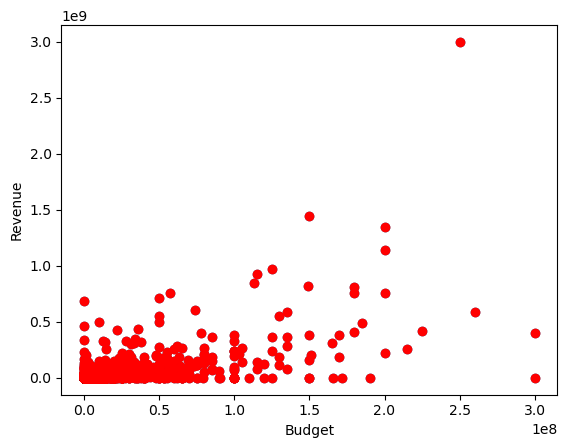

In [8]:
plt.scatter(df['budget'], df['revenue'])
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.plot(df['budget'], df['revenue'], "ro")

## Interpretation: "Pearson Correlation Coefficient"
The correlation matrix shows, that there is a strong relationship
between budget and revenue. This suggests, that higher budgeted productions
generate more revenue at the box offices.

(It is obvious, that the quality of the data is lacking and therefor might
distort the values. There are data instances where production OR revenue is 0.00)

In [24]:
# ------ Linear Regression ------

X = df[["budget"]]
y = df["revenue"]

model = LinearRegression()
model.fit(X, y)

beta_0 = model.intercept_
beta_1 = model.coef_[0]
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

print(f"Intercept (β₀): {beta_0:.2f}")
print(f"Slope (β₁): {beta_1:.4f}")
print(f"R-squared: {r2:.4f}")

Intercept (β₀): -204927.08
Slope (β₁): 2.4255
R-squared: 0.3936


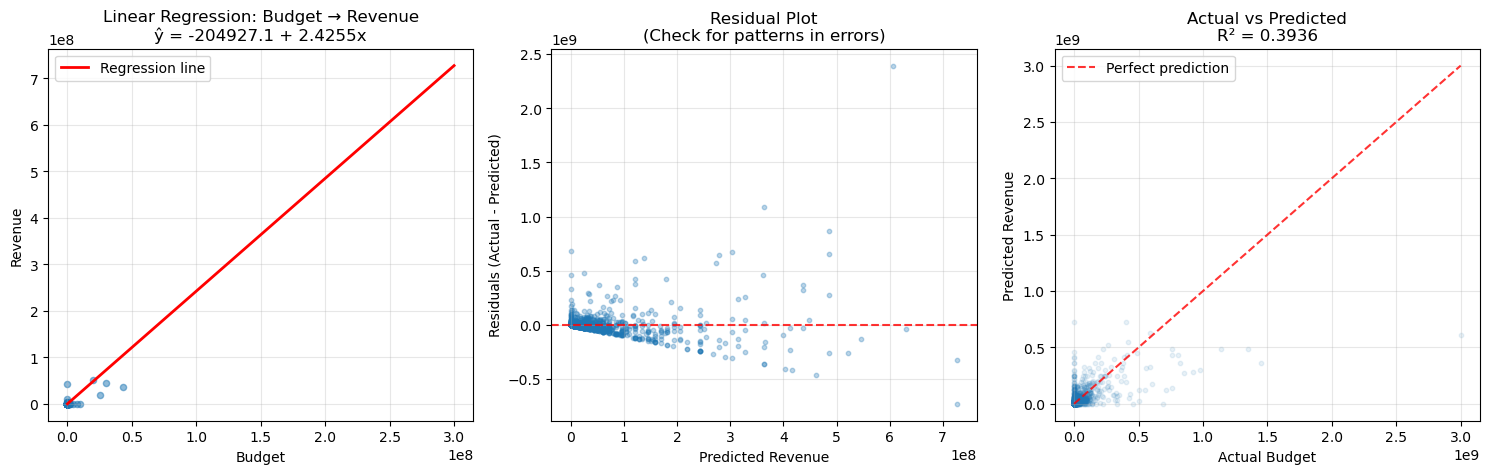

In [ ]:
# Taking a sample for visualization
# sample = df.sample(int(np.ceil(X.size * 0.25)), random_state=1)
# sample = df.sample(int(np.ceil(X.size * 0.25)))
sample = df.sample(100)
plt.figure(figsize=(15, 5))

# Plot 1: Regression line
plt.subplot(1, 3, 1)
plt.scatter(sample['budget'], sample['revenue'], alpha=0.5, s=20)

# Plot regression line
x_range = np.linspace(X['budget'].min(), X['budget'].max(), 100)
y_range = beta_0 + beta_1 * x_range
plt.plot(x_range, y_range, 'r-', linewidth=2, label='Regression line')

plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title(f'Linear Regression: Budget → Revenue\nŷ = {beta_0:.1f} + {beta_1:.4f}x')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Residuals (errors)
plt.subplot(1, 3, 2)
residuals = y - y_pred
plt.scatter(y_pred, residuals, alpha=0.3, s=10)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.8)
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot\n(Check for patterns in errors)')
plt.grid(True, alpha=0.3)

# Plot 3: Actual vs Predicted
plt.subplot(1, 3, 3)
plt.scatter(y, y_pred, alpha=0.1, s=10)
# Perfect prediction line
min_val = min(y.min(), y_pred.min())
max_val = max(y.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.8, label='Perfect prediction')
plt.xlabel('Actual Budget')
plt.ylabel('Predicted Revenue')
plt.title(f'Actual vs Predicted\nR² = {r2:.4f}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Interpretation: Linear Regression model
The visual examination of the data suggests, that there is no linear relationship between budget
and revenue